#Upload your API Token in the content folder
####Token should be in .JSON format

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [2]:
!kaggle datasets download -d vijaykumar1799/face-mask-detection

 99% 220M/222M [00:08<00:00, 22.5MB/s]
100% 222M/222M [00:08<00:00, 27.4MB/s]


In [3]:
import zipfile
zfile=zipfile.ZipFile("face-mask-detection.zip")
zfile.extractall()
zfile.close()

In [4]:
for dirpath, dirnames, files in os.walk("Dataset"):
  print(f"there are {len(dirnames)} dir and {len(files)} files in {dirpath}")

there are 3 dir and 0 files in Dataset
there are 0 dir and 2994 files in Dataset/without_mask
there are 0 dir and 2994 files in Dataset/with_mask
there are 0 dir and 2994 files in Dataset/mask_weared_incorrect


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def show_random_img():
  img_type=random.sample(os.listdir("Dataset"),1)
  img_file=random.sample(os.listdir("Dataset/"+img_type[0]),1)
  img_dir="Dataset/"+img_type[0]+"/"+img_file[0]
  img=mpimg.imread(img_dir)
  plt.imshow(img)
  plt.title(f"image tagged as: {img_type[0]}")
  return img_dir

'Dataset/with_mask/1767.png'

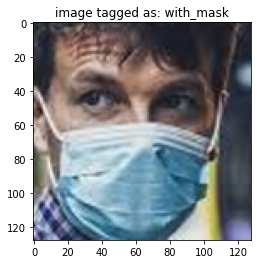

In [6]:
show_random_img()

In [7]:
import pathlib
import numpy as np
data_dir = pathlib.Path("Dataset")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['mask_weared_incorrect' 'with_mask' 'without_mask']


In [8]:
import tensorflow as tf
image_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.,validation_split=0.2)
train_img=image_datagen.flow_from_directory("Dataset",
                                          batch_size=32,
                                          seed=42,
                                          class_mode="categorical",
                                          target_size=(224,224),
                                          subset="training")
test_img=image_datagen.flow_from_directory("Dataset",
                                           batch_size=32,
                                           seed=42,
                                           class_mode="categorical",
                                           target_size=(224,224),
                                           subset="validation")

Found 7188 images belonging to 3 classes.
Found 1794 images belonging to 3 classes.


In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D
from tensorflow.keras.models import Sequential
model=Sequential([Conv2D(filters=10,kernel_size=3,input_shape=(224,224,3),activation="relu"),
                  MaxPool2D(pool_size=2),
                  Conv2D(filters=10,kernel_size=3,activation="relu"),
                  Flatten(),
                  Dense(3,activation="softmax")
                ])
model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model.fit(train_img,epochs=5,steps_per_epoch=len(train_img), validation_data=test_img,validation_steps=len(test_img))

Epoch 1/5
225/225 [==============================] - 27s 77ms/step - loss: 0.5545 - accuracy: 0.8375 - val_loss: 0.2761 - val_accuracy: 0.8997
Epoch 2/5
225/225 [==============================] - 15s 68ms/step - loss: 0.1739 - accuracy: 0.9375 - val_loss: 0.2458 - val_accuracy: 0.9036
Epoch 3/5
225/225 [==============================] - 15s 67ms/step - loss: 0.1258 - accuracy: 0.9567 - val_loss: 0.3186 - val_accuracy: 0.8807
Epoch 4/5
225/225 [==============================] - 15s 67ms/step - loss: 0.0906 - accuracy: 0.9706 - val_loss: 0.1353 - val_accuracy: 0.9593
Epoch 5/5
225/225 [==============================] - 15s 68ms/step - loss: 0.0609 - accuracy: 0.9791 - val_loss: 0.1716 - val_accuracy: 0.9571


In [10]:
model.evaluate(test_img)

57/57 [==============================] - 3s 51ms/step - loss: 0.1716 - accuracy: 0.9571


[0.17163005471229553, 0.9570791721343994]

In [11]:
def give_image_to_test(shape): 
  img_dir=show_random_img()
  image=tf.io.read_file(img_dir)
  image=tf.image.decode_image(image,channels=3)
  image=tf.image.resize(image,size=(shape,shape))
  image=image/255.
  image=tf.expand_dims(image,axis=0)
  return image

##RUN THE CELL BELOW TO MAKE RANDOM PREDICTIONS

1/1 [==============================] - 0s 119ms/step
prediction: mask_weared_incorrect
surity    : 94.84991431236267


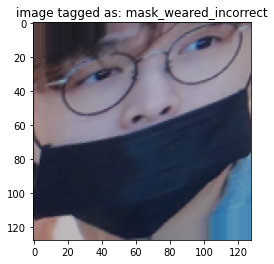

In [12]:
image=give_image_to_test(224)
pred=model.predict(image)[0]
idx=pred.argmax()
print(f"prediction: {class_names[idx]}")
print(f"surity    : {pred[idx]*100}")